In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from platform import python_version
print(python_version())


3.9.7


# Reading in the survey data from the csv file
This will also prepare the data for graphing

In [12]:
s_data = pd.read_csv('surveydata.csv')

#Step 1 Localise the data
title_data = "How rested or refreshed do you feel when you wake up for the day?"
data_bar = s_data[title_data] #Note When Using How - usualy categorical data from 1-5, what is usaully some other type
frequency = data_bar.value_counts(sort=False).sort_index(ascending=True).to_numpy() #Extracts the frequncy of responses per category
ypos =  np.arange(len(frequency)) #Automatically assigns indexs for each number in the data

temp = data_bar.unique() #Extracted range of different rows
temp = np.sort(temp)  #Sorting Range into order


In [13]:
class Graphs():
    
    def __init__(self):
        pass
    
    def graph_bar(self, title, title_x, title_y, data_x, data_y, label_y):
        fig, ax = plt.subplots()
        hbars = ax.barh(data_y, data_x, align='center')

        ax.set_yticks(ticks=data_y) #Note if you coppy tuts on line they have changed this so it needs to be done in two lines
        ax.set_yticklabels(label_y)
        ax.invert_yaxis()
        ax.set_ylabel(title_y)
        ax.set_xlabel(title_x)
        ax.set_title(title)

        for i in range(len(data_y)): #Adding Labels to the Graph
          plt.text(data_x[i]/2, i, data_x[i], ha='center', va = 'center', color='white', fontweight='bold')

        plt.show()

# Graphing a barchart

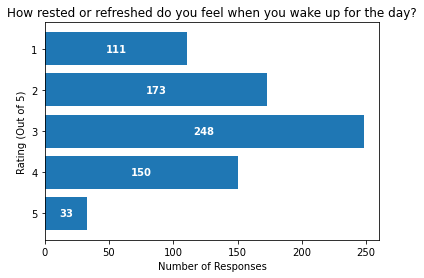

In [14]:


fig, ax = plt.subplots()
hbars = ax.barh(ypos, frequency, align='center')

ax.set_yticks(ticks=ypos) #Note if you coppy tuts on line they have changed this so it needs to be done in two lines
ax.set_yticklabels(temp)
ax.invert_yaxis()
ax.set_ylabel("Rating (Out of 5)")
ax.set_xlabel("Number of Responses")
ax.set_title(title_data)

for i in range(len(frequency)): #Adding Labels to the Graph
  plt.text(frequency[i]/2, i, frequency[i], ha='center', va = 'center', color='white', fontweight='bold')


plt.show()

def testfun(test, p, a):
    print(f"{test}. {p}, {a}")


In [25]:
testfun("hello", "my", "name")

hello. my, name


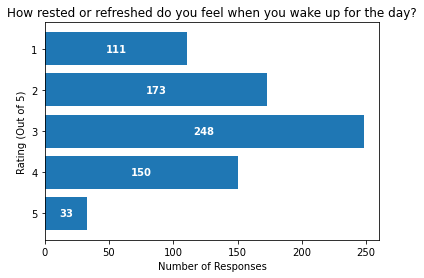

In [15]:
from graphs import Graphs


gph = Graphs()
# gph.graph_bar(title="How rested or refreshed do you feel when you wake up for the day?", title_x="Number of Responses", title_y="Rating (Out of 5)", data_x=frequency, data_y=ypos, label_y=temp)
gph.graph_bar("How rested or refreshed do you feel when you wake up for the day?", "Number of Responses", "Rating (Out of 5)", frequency, ypos, temp)

ValueError: Expected object or value